In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('..\sensex_data_INFY_2000_to_2024.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03 00:00:00+05:30,74.584143,74.585098,74.584143,74.585098,657536,0.0,0.0
1,2000-01-04 00:00:00+05:30,80.192829,80.552026,77.581789,80.459663,7191808,0.0,0.0
2,2000-01-05 00:00:00+05:30,74.946929,77.567517,74.023041,74.023041,21069440,0.0,0.0
3,2000-01-06 00:00:00+05:30,72.825841,73.032766,68.101143,68.101143,10495616,0.0,0.0
4,2000-01-07 00:00:00+05:30,62.653038,62.653038,62.653038,62.653038,971392,0.0,0.0
...,...,...,...,...,...,...,...,...
6229,2024-12-23 00:00:00+05:30,1874.573249,1884.237202,1854.128257,1868.988525,2781793,0.0,0.0
6230,2024-12-24 00:00:00+05:30,1871.659493,1886.179727,1787.111585,1854.176880,2360544,0.0,0.0
6231,2024-12-26 00:00:00+05:30,1854.176937,1864.569333,1847.620957,1852.574341,3623321,0.0,0.0
6232,2024-12-27 00:00:00+05:30,1854.516807,1868.842838,1849.174898,1861.655518,3937500,0.0,0.0


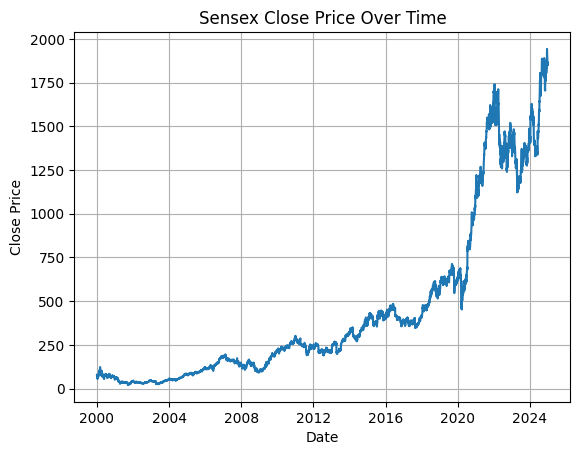

In [18]:

import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Sensex Close Price Over Time')
plt.grid(True)
plt.show()

In [19]:
df_custom = df[['Volume','Close']]
df_custom

,Volume,Close
0,657536,74.585098
1,7191808,80.459663
2,21069440,74.023041
3,10495616,68.101143
4,971392,62.653038
...,...,...
6229,2781793,1868.988525
6230,2360544,1854.176880
6231,3623321,1852.574341
6232,3937500,1861.655518


In [20]:
df_custom_nonzero = df_custom[df_custom['Volume'] >0].reset_index(drop=True)
df_custom_nonzero

,Volume,Close
0,657536,74.585098
1,7191808,80.459663
2,21069440,74.023041
3,10495616,68.101143
4,971392,62.653038
...,...,...
6169,2781793,1868.988525
6170,2360544,1854.176880
6171,3623321,1852.574341
6172,3937500,1861.655518


In [21]:
close_prices = df_custom_nonzero['Close']
print(close_prices)

0         74.585098
1         80.459663
2         74.023041
3         68.101143
4         62.653038
           ...     
6169    1868.988525
6170    1854.176880
6171    1852.574341
6172    1861.655518
6173    1851.214478
Name: Close, Length: 6174, dtype: float64


In [22]:
import numpy as np
close_prices_array = close_prices.to_numpy()
close_prices_array.shape

(6174,)

In [23]:
close_prices_array

array([  74.58509827,   80.45966339,   74.02304077, ..., 1852.57434082,
       1861.65551758, 1851.21447754], shape=(6174,))

In [24]:
#Find ema9, ema20, ema50, ema100, ema200 and ema500 of close prices
ema9 = close_prices.ewm(span=9, adjust=False).mean()
ema20 = close_prices.ewm(span=20, adjust=False).mean()
ema50 = close_prices.ewm(span=50, adjust=False).mean()
ema100 = close_prices.ewm(span=100, adjust=False).mean()
ema200 = close_prices.ewm(span=200, adjust=False).mean()
ema500 = close_prices.ewm(span=500, adjust=False).mean()

In [25]:
df_custom_nonzero['EMA9'] = ema9
df_custom_nonzero['EMA20'] = ema20
df_custom_nonzero['EMA50'] = ema50
df_custom_nonzero['EMA100'] = ema100
df_custom_nonzero['EMA200'] = ema200
df_custom_nonzero['EMA500'] = ema500
df_custom_nonzero

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500
0,657536,74.585098,74.585098,74.585098,74.585098,74.585098,74.585098,74.585098
1,7191808,80.459663,75.760011,75.144581,74.815473,74.701426,74.643552,74.608550
2,21069440,74.023041,75.412617,75.037767,74.784398,74.687993,74.637377,74.606212
3,10495616,68.101143,73.950322,74.377136,74.522309,74.557560,74.572340,74.580244
4,971392,62.653038,71.690865,73.260556,74.056848,74.321827,74.453740,74.532630
...,...,...,...,...,...,...,...,...
6169,2781793,1868.988525,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668
6170,2360544,1854.176880,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191
6171,3623321,1852.574341,1877.364046,1871.376780,1842.041094,1791.353025,1693.894368,1536.949222
6172,3937500,1861.655518,1874.222341,1870.450946,1842.810287,1792.745154,1695.563633,1538.245455


Now calculate MACD (Mean Average Convergence Divergence)

In [26]:
ema12 = close_prices.ewm(span=12, adjust=False).mean()
ema26 = close_prices.ewm(span=26, adjust=False).mean()
macd = ema12 - ema26
signal = macd.ewm(span=9, adjust=False).mean()
macd_sig_dif = macd - signal
macd_sig_dif.tail(20)

6154     4.691083
6155     4.605654
6156     4.080725
6157     6.301635
6158     6.514671
6159     6.292354
6160     7.260392
6161     8.950612
6162    10.194188
6163    11.060097
6164     9.613538
6165     7.775611
6166     6.142907
6167     2.510011
6168    -1.640194
6169    -4.269369
6170    -6.876149
6171    -8.473594
6172    -8.653543
6173    -9.161740
Name: Close, dtype: float64

In [27]:
#Add macd_sig_dif to dataframe
df_custom_nonzero['MACD'] = macd_sig_dif
df_custom_nonzero

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD
0,657536,74.585098,74.585098,74.585098,74.585098,74.585098,74.585098,74.585098,0.000000
1,7191808,80.459663,75.760011,75.144581,74.815473,74.701426,74.643552,74.608550,0.374901
2,21069440,74.023041,75.412617,75.037767,74.784398,74.687993,74.637377,74.606212,0.178604
3,10495616,68.101143,73.950322,74.377136,74.522309,74.557560,74.572340,74.580244,-0.332977
4,971392,62.653038,71.690865,73.260556,74.056848,74.321827,74.453740,74.532630,-0.984359
...,...,...,...,...,...,...,...,...,...
6169,2781793,1868.988525,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369
6170,2360544,1854.176880,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149
6171,3623321,1852.574341,1877.364046,1871.376780,1842.041094,1791.353025,1693.894368,1536.949222,-8.473594
6172,3937500,1861.655518,1874.222341,1870.450946,1842.810287,1792.745154,1695.563633,1538.245455,-8.653543


Now calculate the RSI (Relative Strength Index) and add column RSI to the dataframe

In [30]:
n=14
difference = df_custom_nonzero['Close'].diff()
gain = difference.where(difference > 0, 0)
loss = -difference.where(difference < 0, 0)
avg_gain = gain.ewm(alpha=1/n, min_periods=n).mean()
avg_loss = loss.ewm(alpha=1/n, min_periods=n).mean()
RS = avg_gain / avg_loss
RSI = 100 - (100 / (1 + RS))
df_custom_nonzero['RSI'] = RSI
df_custom_nonzero_nonnan = df_custom_nonzero.dropna().reset_index(drop=True)
df_custom_nonzero_nonnan

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,19778560,60.846550,61.285038,65.265204,69.784212,71.959252,73.210511,74.019727,-0.756295,37.852644
1,20786048,64.059799,61.839990,65.150403,69.559725,71.802828,73.119459,73.979967,-0.259355,44.944262
2,25256320,66.248848,62.721762,65.255017,69.429887,71.692848,73.051095,73.949104,0.237225,49.197353
3,20469632,67.349594,63.647328,65.454501,69.348307,71.606843,72.994364,73.922758,0.637554,51.237243
4,12953792,70.557755,65.029413,65.940525,69.395736,71.586069,72.970119,73.909325,1.089607,56.694977
...,...,...,...,...,...,...,...,...,...,...
6156,2781793,1868.988525,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369,50.862381
6157,2360544,1854.176880,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501
6158,3623321,1852.574341,1877.364046,1871.376780,1842.041094,1791.353025,1693.894368,1536.949222,-8.473594,47.407003
6159,3937500,1861.655518,1874.222341,1870.450946,1842.810287,1792.745154,1695.563633,1538.245455,-8.653543,49.588099


Now we create a target column. We will first try to make it a classification problem. The possible outputs will be: 1, 0, -1.
The target will be 1 if the close price increases by 0.25% or more in the next day. It will be -1 if the close price decreases
by 0.25% or more in the next day. Otherwise, it will be 0.

In [31]:
current_price = df_custom_nonzero_nonnan['Close']
next_day_price = df_custom_nonzero_nonnan['Close'].shift(periods=-1)
percent_change = ((next_day_price - current_price)/current_price) * 100 if next_day_price is not None else None
conditions =[percent_change >= 0.25, (percent_change < 0.25) & (percent_change > -0.25), percent_change <= -0.25]
corresponding_values = [1, 0, -1]
df_custom_nonzero_nonnan['Target'] = np.select(conditions, corresponding_values, default=None)
df_final = df_custom_nonzero_nonnan.iloc[:-1]
df_final

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI,Target
0,19778560,60.846550,61.285038,65.265204,69.784212,71.959252,73.210511,74.019727,-0.756295,37.852644,1
1,20786048,64.059799,61.839990,65.150403,69.559725,71.802828,73.119459,73.979967,-0.259355,44.944262,1
2,25256320,66.248848,62.721762,65.255017,69.429887,71.692848,73.051095,73.949104,0.237225,49.197353,1
3,20469632,67.349594,63.647328,65.454501,69.348307,71.606843,72.994364,73.922758,0.637554,51.237243,1
4,12953792,70.557755,65.029413,65.940525,69.395736,71.586069,72.970119,73.909325,1.089607,56.694977,1
...,...,...,...,...,...,...,...,...,...,...,...
6155,11056720,1866.900269,1896.387395,1876.047081,1839.959902,1787.202552,1688.880568,1533.066662,-1.640194,50.438811,0
6156,2781793,1868.988525,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369,50.862381,-1
6157,2360544,1854.176880,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501,0
6158,3623321,1852.574341,1877.364046,1871.376780,1842.041094,1791.353025,1693.894368,1536.949222,-8.473594,47.407003,1


Now save the final dataframe to a csv file named 'sensex_transformed_data.csv'.

In [32]:
df_final.to_csv('..\sensex_INFY_transformed_data.csv')

For Machine learning model, we don't need the close price column as we are trying to predict this column through target column.
So remove the close price column from the data frame.

In [33]:
df_final_without_close = df_final.drop(columns=['Close'])
df_final_without_close.to_csv('..\INFY_for_ml.csv')